In [1]:
import json
import numpy as np
import pandas as pd
import pydeck as pdk
    
columns = ["callsign", "sentence_counter", "time", "latitude", "longitude", "altitude", "horizontal_speed",
           "heading", "satellites", "internal_temperature", "battery_voltage", "battery_current",
           "external_temperature", "pressure", "humidity"]
    
df = pd.read_csv(
    "telemetry.txt", delimiter=",", header=None,
    names=columns)

df = df.dropna()

df = df.loc[df["time"] != "00:00:00" ]


df['humidity'] = df['humidity'].map(lambda x: str(x)[:-5])
df['humidity'] = pd.to_numeric(df['humidity'])

get_position_js = [
    "longitude",
    "latitude",
    "altitude",
]

max_temp = df["internal_temperature"].max()

get_color_js = [
    f"255 * (internal_temperature / {max_temp})",
    "55",
    f"255 * (1 - (internal_temperature / {max_temp}))"
]

df["time"] = "2022-08-27 " + df["time"]

unix_seconds = (pd.to_datetime(df["time"]).astype(np.int64) / 10**9).astype(np.int64)
seconds_diff = unix_seconds.diff()
altitude_diff = df["altitude"].diff()
df["vertical_speed"] = altitude_diff / seconds_diff

df["vertical_acceleration"] = df["vertical_speed"].diff() / seconds_diff


layer = pdk.Layer(
    "ScatterplotLayer",
    df,
    pickable=True,
    opacity=1,
    stroked=False,
    filled=True,
    radius_scale=6,
    radius_min_pixels=1,
    radius_max_pixels=100,
    line_width_min_pixels=1,
    get_position=get_position_js,
    get_radius=2,
    get_fill_color=get_color_js,
    billboard=True
)

initial_view_state = pdk.ViewState(latitude=50.18105, longitude=8.69444, zoom=8, max_zoom=16, pitch=50, bearing=0)

r = pdk.Deck(layers=[layer], initial_view_state = initial_view_state, map_style=pdk.map_styles.LIGHT)
r.to_html("scatterplot_layer.html")

In [2]:
# Display statistics
df.describe()

,sentence_counter,latitude,longitude,altitude,horizontal_speed,heading,satellites,internal_temperature,battery_voltage,battery_current,external_temperature,pressure,humidity,vertical_speed,vertical_acceleration
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,535.000000,532.000000
mean,1572.747811,50.043987,6.749243,32067.700525,47.616462,253.437828,9.959720,27.855342,5.072504,0.181392,6.331524,78.322242,5.229247,1.007354,-0.026758
std,449.020083,0.062504,1.281136,8996.677944,16.882723,70.011259,3.330896,4.492015,0.835231,0.032308,6.155835,252.363997,13.918729,25.590355,0.611064
min,10.000000,49.881090,4.419380,188.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.152000,-6.600000,8.000000,0.700000,-2.975610,-14.087302
25%,1526.500000,50.015615,5.763155,34053.500000,39.000000,266.000000,8.000000,27.800000,5.100000,0.163000,1.900000,9.000000,1.200000,-0.356818,-0.006036
50%,1669.000000,50.041570,6.782790,34814.000000,53.000000,272.000000,12.000000,28.500000,5.300000,0.166000,5.700000,9.000000,1.500000,-0.097561,0.000142
75%,1811.500000,50.088840,7.852340,34978.000000,57.000000,277.000000,12.000000,29.100000,5.400000,0.186000,9.400000,9.000000,1.700000,0.121951,0.006565
max,1954.000000,50.141900,8.726510,35211.000000,85.000000,302.000000,12.000000,30.800000,5.800000,0.354000,23.300000,997.000000,64.200000,591.666667,0.138608


<Axes: xlabel='time'>

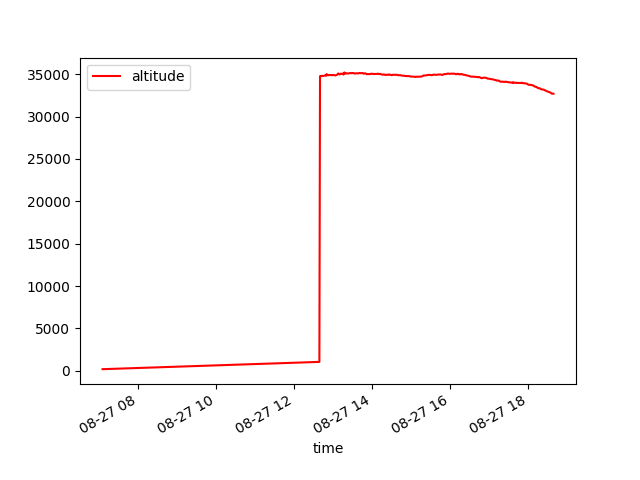

In [3]:
df["time"] = pd.to_datetime(df["time"])
%matplotlib widget
df.plot(kind="line",x="time",y="altitude",color="red")

<Axes: xlabel='time'>

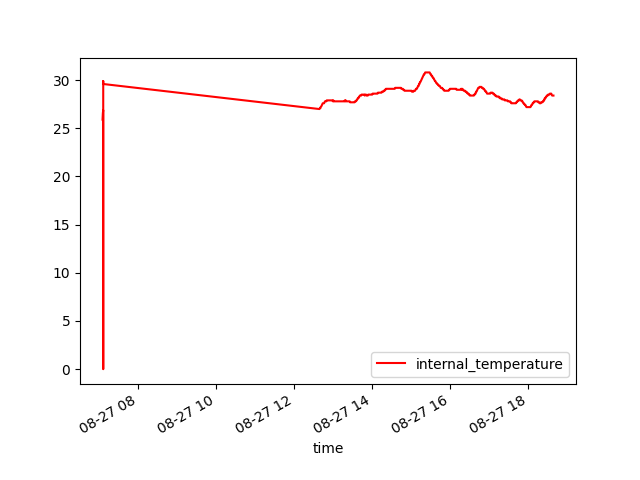

In [4]:
df.plot(kind="line",x="time",y="internal_temperature",color="red")

<Axes: xlabel='time'>

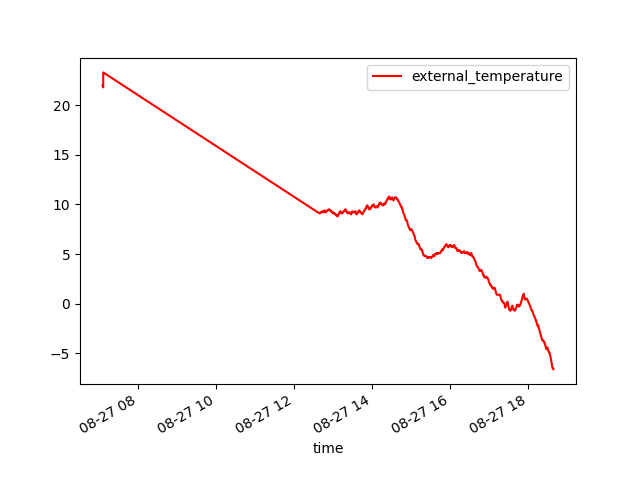

In [5]:
df.plot(kind="line",x="time",y="external_temperature",color="red")

<Axes: xlabel='time'>

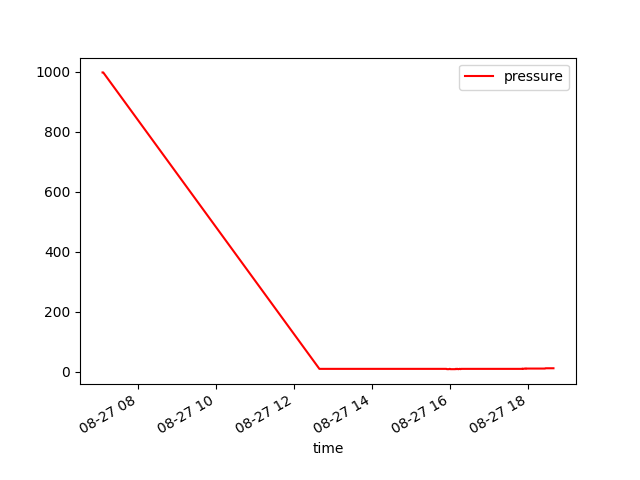

In [6]:
df.plot(kind="line",x="time",y="pressure",color="red")

<Axes: xlabel='time'>

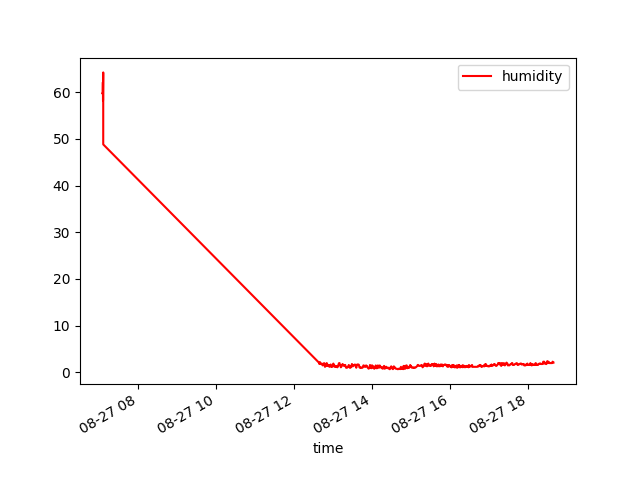

In [7]:
df.plot(kind="line",x="time",y="humidity",color="red")

<Axes: xlabel='time'>

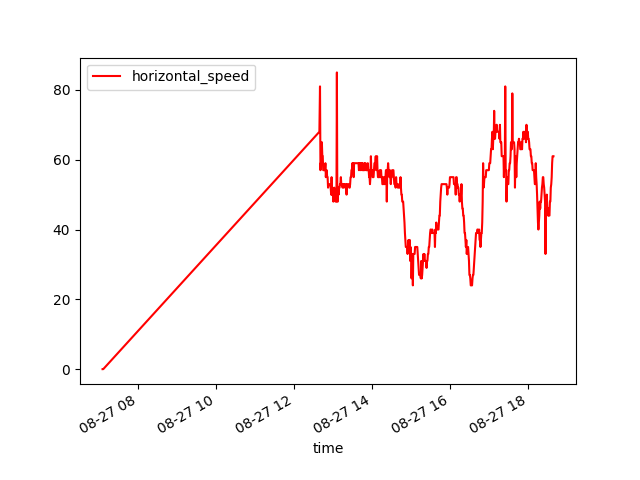

In [8]:
df.plot(kind="line",x="time",y="horizontal_speed",color="red")